# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\nien\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units,activation='relu',name = 'hidden_layer' + str(i))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units,activation='relu',name = 'hidden_layer' + str(i))(x)
        
    out = keras.layers.Dense(units = output_units,activation='softmax',name = 'output')(x)
    model = keras.models.Model(inputs = [input_layer],outputs=[out])

    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 3
BATCH_SIZE = 256
MOMENTUM = 0.95
optimizer = ['sgd','adam','RMSprop']

In [7]:
results = {}
for i,lr in enumerate (LEARNING_RATE):
    for j,opt in enumerate (optimizer):
        print("Experiment with LR = %.6f , opt = %s" % (lr,opt))
        keras.backend.clear_session()
        model = build_mlp(input_shape = x_train.shape[1:])
        #model.summary()
        model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = opt)
        model.fit(x_train,y_train,epochs = EPOCHS,batch_size=BATCH_SIZE,validation_data = (x_test,y_test),shuffle = 'True')
        
        train_loss = model.history.history['loss']
        val_loss = model.history.history['val_loss']
        train_acc = model.history.history['acc']
        val_acc = model.history.history['val_acc']
        
        tag = "lr-%s,opt-%s" %(lr,opt)
        results[tag] = {
            'train_loss' : train_loss,
            'val_loss' : val_loss,
            'train_acc' : train_acc,
            'val_acc' : val_acc,
        }
        

Experiment with LR = 0.100000 , opt = sgd
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 8s 159us/step - loss: 2.0698 - acc: 0.2577 - val_loss: 1.9704 - val_acc: 0.2717
Epoch 2/3
50000/50000 [==============================] - 4s 72us/step - loss: 1.8885 - acc: 0.3336 - val_loss: 1.9038 - val_acc: 0.3288
Epoch 3/3
50000/50000 [==============================] - 4s 73us/step - loss: 1.8226 - acc: 0.3588 - val_loss: 1.8183 - val_acc: 0.3560
Experiment with LR = 0.100000 , opt = adam
Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 4s 85us/step - loss: 1.9086 - acc: 0.3113 - val_loss: 1.7428 - val_acc: 0.3844
Epoch 2/3
50000/50000 [==============================] - 4s 80us/step - loss: 1.6900 - acc: 0.3966 - val_loss: 1.6527 - val_

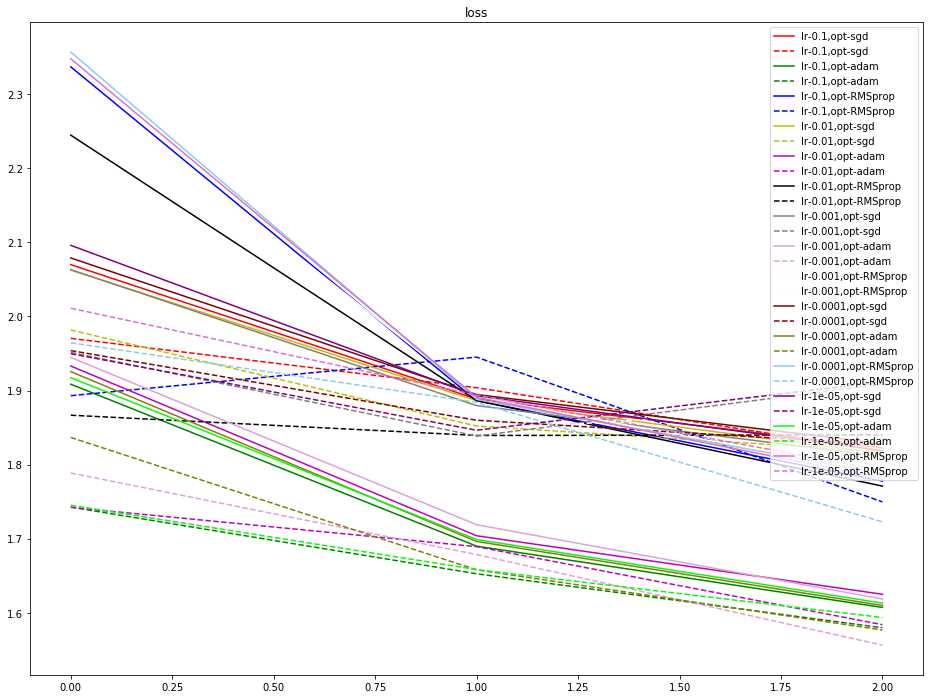

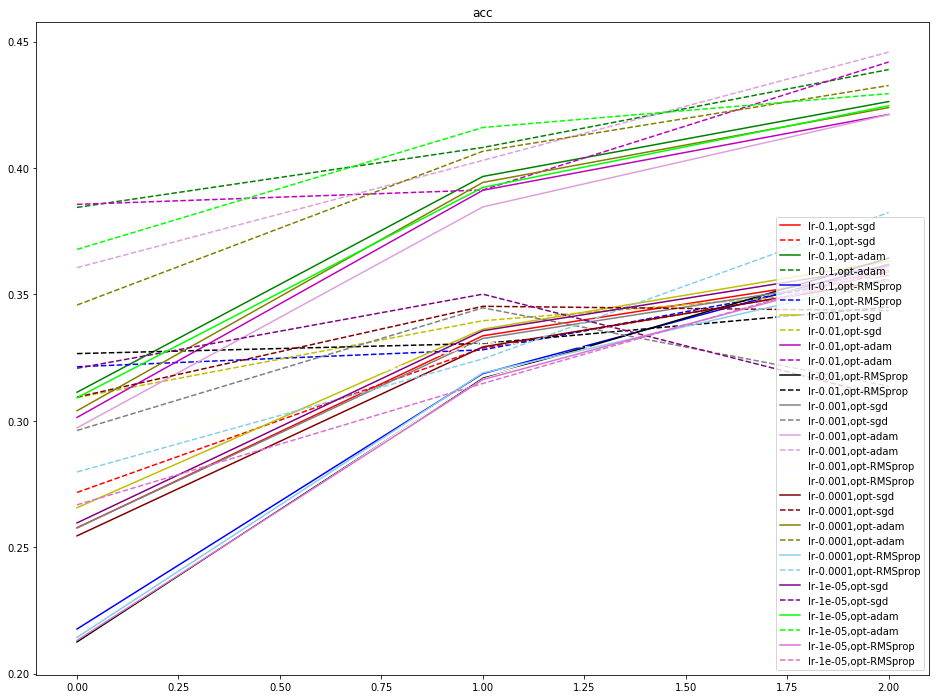

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k" , "gray" , "plum" , "ivory" , "maroon" , "olive" , "skyblue" , "purple" , "lime" , "orchid" ]
plt.figure(figsize = (16,12))

for i,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',label = cond,color = color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])),results[cond]['val_loss'],'--',label = cond,color = color_bar[i])
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize = (16,12))
for i,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',label = cond,color = color_bar[i])
    plt.plot(range(len(results[cond]['val_acc'])),results[cond]['val_acc'],'--',label = cond,color = color_bar[i])
plt.title('acc')
plt.legend()
plt.show()